# Steps
- `import gym`
- `make("<task_name>")` to create the env
- `env.reset()` to reset the env, set steps to 0 and returns the env
- Create a loop to run for n timesteps
    - Create an action with `env.action_space.sample()` which takes a random action from the available actions
    - `env.step(action)` to run the simulation for 1 time step
- `env.close()` to close the env

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import flappy_bird_env
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [6]:
env = gym.make("CartPole-v1", render_mode="human")

In [7]:
episodes = 25
epi_score = []
step_score = []

In [8]:
for i in range(episodes):
    obs, info = env.reset()
    truncated = False
    terminated = False
    cum_reward = 0

    step_score.append([])

    while not terminated and not truncated:
    # while not terminated:
    # for j in range(20):
        env.render()
        action = env.action_space.sample()

        obs, reward, terminated, truncated, info = env.step(action)
        cum_reward += reward
        step_score[i].append(cum_reward)

    epi_score.append(cum_reward)
env.close()

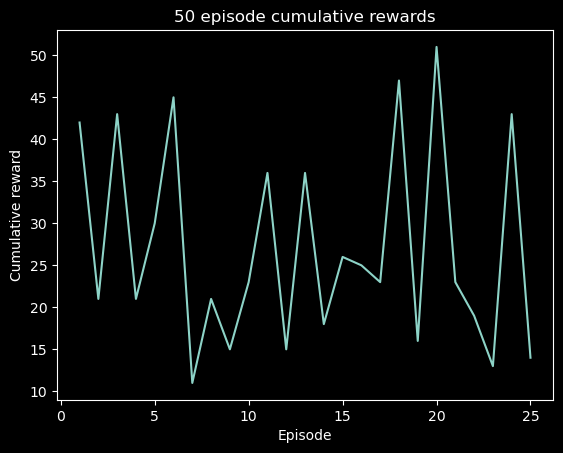

In [9]:
plt.title("50 episode cumulative rewards")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(range(1,len(epi_score) + 1), epi_score)

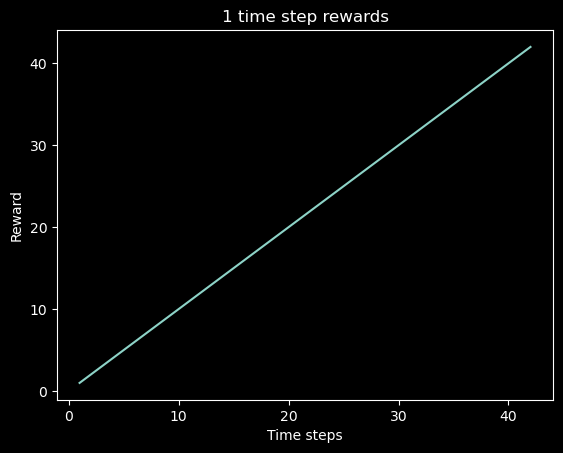

In [10]:
plt.title("1 time step rewards")
plt.xlabel("Time steps")
plt.ylabel("Reward")
plt.plot(range(1,len(step_score[0]) + 1), step_score[0])